Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,root_mean_squared_error,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("C://Users//USER//Downloads//folder//city_day.csv")

In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
df.shape

(29531, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### Data Cleaning

In [7]:
#checking it=f any features have null values if theere are how many null values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [11]:
percentage_of_nulls_per_column=((df.isnull().sum())/(df.shape[0]))*100

In [13]:
percentage_of_nulls_per_column

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

**Based on the above percentage caluculation we can see that one column has more than 60 % null values so we are going to remove the column which has more than 60 percentage of null values and remaining with techniques**

In [14]:
#dropping the col with > 60% null values
df=df.drop('Xylene',axis=1)

In [15]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory


In [20]:
#replacing null value with its median we cam also use median  cux thery are numerical data
df['PM2.5']=df['PM2.5'].fillna(np.mean(df['PM2.5']))
df['PM10']=df['PM10'].fillna(np.mean(df['PM10']))
df['NO']=df['NO'].fillna(np.mean(df['NO']))
df['NO2']=df['NO2'].fillna(np.mean(df['NO2']))
df['NOx']=df['NOx'].fillna(np.mean(df['NOx']))
df['NH3']=df['NH3'].fillna(np.mean(df['NH3']))
df['CO']=df['CO'].fillna(np.mean(df['CO']))
df['SO2']=df['SO2'].fillna(np.mean(df['SO2']))
df['O3']=df['O3'].fillna(np.mean(df['O3']))
df['Benzene']=df['Benzene'].fillna(np.mean(df['Benzene']))
df['Toluene']=df['Toluene'].fillna(np.mean(df['Toluene']))

In [21]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,NaN,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,NaN,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,NaN,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,NaN,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,41.0,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,54.0,Satisfactory


In [22]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI           4681
AQI_Bucket    4681
dtype: int64

Now we left with 2 columns with null values

In [29]:
#for AQI also we are using median
df['AQI']=df['AQI'].fillna(df['AQI'].median())

In [30]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI              0
AQI_Bucket    4681
dtype: int64

now are still left with one column 

In [34]:
df['AQI_Bucket'].value_counts().sort(

<bound method Series.sort_index of AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64>

In [39]:
def get_bucket(aqi):
    if pd.isna(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    elif aqi <= 500:
        return 'Severe'
    else:
        return 'Unknown'

df['AQI_Bucket'] = df.apply(lambda row: get_bucket(row['AQI']) if pd.isna(row['AQI_Bucket']) else row['AQI_Bucket'], axis=1)

We Mapped with the help of AQI range

In [40]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

**Now,Clearing Null-Values now we have to convert categorical values**

In [41]:
#checking which are catergorical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  AQI         29531 non-null  float64
 14  AQI_Bucket  29531 non-null  object 
dtypes: float64(12), object(3)
memory usage: 3.4+ MB


Based on above information we can see that we have 3 categorical columns : They are
*  City
*  Date
*  AQI_Bucket

In [43]:
dummies=pd.get_dummies(df['City'])

In [44]:
dummies

,Ahmedabad,Aizawl,Amaravati,Amritsar,Bengaluru,Bhopal,Brajrajnagar,Chandigarh,Chennai,Coimbatore,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
29527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
29528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
29529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [46]:
df=pd.concat([df,dummies],axis=1)

In [47]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,False,False,False,False,False,False,False,False,False,False
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,False,False,False,False,False,False,False,False,False,False
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,False,False,False,False,False,False,False,False,False,False
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,False,False,False,False,False,False,False,False,False,False
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,False,False,False,False,False,False,False,False,False,True
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,False,False,False,False,False,False,False,False,False,True
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,False,False,False,False,False,False,False,False,False,True
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,False,False,False,False,False,False,False,False,False,True


In [48]:
 import datetime

In [53]:
df['Date']=pd.to_datetime(df['Date'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   City                29531 non-null  object        
 1   Date                29531 non-null  datetime64[ns]
 2   PM2.5               29531 non-null  float64       
 3   PM10                29531 non-null  float64       
 4   NO                  29531 non-null  float64       
 5   NO2                 29531 non-null  float64       
 6   NOx                 29531 non-null  float64       
 7   NH3                 29531 non-null  float64       
 8   CO                  29531 non-null  float64       
 9   SO2                 29531 non-null  float64       
 10  O3                  29531 non-null  float64       
 11  Benzene             29531 non-null  float64       
 12  Toluene             29531 non-null  float64       
 13  AQI                 29531 non-null  float64   

In [58]:
df['AQI_Bucket'].value_counts().sort_index()

AQI_Bucket
Good             1341
Moderate        13510
Poor             2781
Satisfactory     8224
Severe           1338
Very Poor        2337
Name: count, dtype: int64

In [59]:
aqt_map={
    'Good':0,
    'Moderate':1,
    'Poor':2,
    'Satisfactory':3,
    'Severe':4,
    'Very Poor':5
}

In [61]:
df['AQI_Bucket']=df['AQI_Bucket'].map(aqt_map)

In [94]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [97]:
df=df.drop('Date',axis=1)

In [107]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam,Year,Month,Day,DayOfWeek
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,...,False,False,False,False,False,False,2015,1,1,3
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,...,False,False,False,False,False,False,2015,1,2,4
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,...,False,False,False,False,False,False,2015,1,3,5
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,...,False,False,False,False,False,False,2015,1,4,6
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,...,False,False,False,False,False,False,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,...,False,False,False,False,False,True,2020,6,27,5
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,...,False,False,False,False,False,True,2020,6,28,6
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,...,False,False,False,False,False,True,2020,6,29,0
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,...,False,False,False,False,False,True,2020,6,30,1


**Ok now all values are converted into Numerical Values**

### Splitting the dataset into training and testing

In [110]:
X=df.drop("AQI_Bucket",axis=1)

In [111]:
y=df['AQI_Bucket']

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [118]:
len(X_train),len(X_test)

(23624, 5907)

## Training the models and predicting

In [119]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [120]:
rf=RandomForestClassifier(n_estimators=100)

In [121]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
rf.score(X_test,y_test)

0.9971220585745726

In [124]:
xgbc=XGBClassifier()

In [127]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [128]:
xgbc.score(X_test,y_test)

0.994582698493313

In [136]:
dt=DecisionTreeClassifier()

In [137]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [138]:
dt.score(X_test,y_test)

1.0

In [145]:
y_pred = rf.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [146]:
accuracy_score(y_test,y_pred)

0.9971220585745726

In [147]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 263,    0,    0,    0,    0,    0],
       [   0, 2630,    0,    0,    0,    0],
       [   0,    0,  571,    0,    0,    6],
       [   0,    0,    0, 1675,    0,    0],
       [   0,    0,    2,    0,  271,    4],
       [   0,    0,    5,    0,    0,  480]], dtype=int64)

Text(0.5, 1.0, 'Actual_values vs Predicted_values')

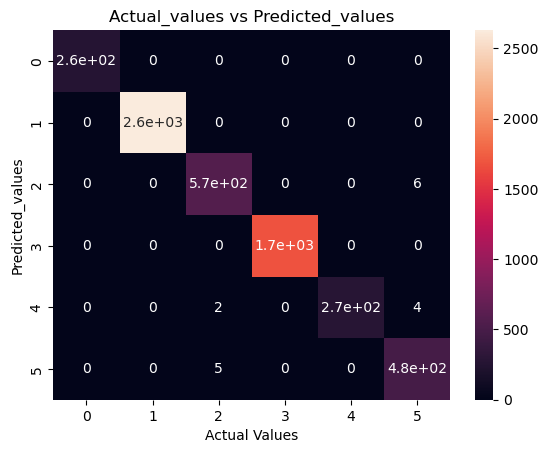

In [150]:
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted_values")
plt.title("Actual_values vs Predicted_values")

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00      2630
           2       0.99      0.99      0.99       577
           3       1.00      1.00      1.00      1675
           4       1.00      0.98      0.99       277
           5       0.98      0.99      0.98       485

    accuracy                           1.00      5907
   macro avg       0.99      0.99      0.99      5907
weighted avg       1.00      1.00      1.00      5907



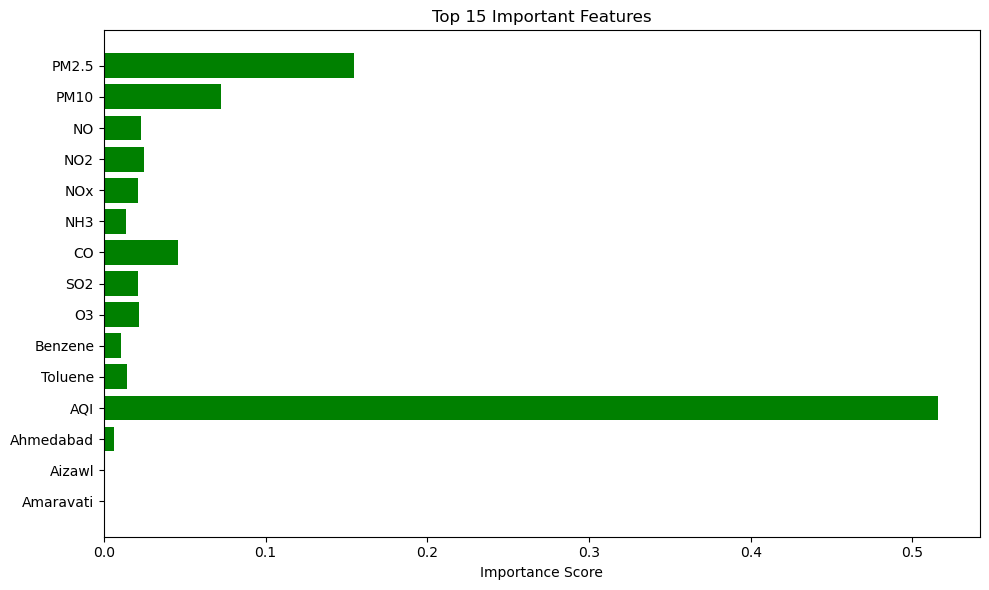

In [155]:
feature_importance=rf.feature_importances_
features=X_train.columns
df_feature=pd.DataFrame({
    'Feautures':features,
    'Feature_importance':feature_importance
})
plt.figure(figsize=(10,6))
plt.barh(df_feature['Feautures'][:15][::-1],df_feature['Feature_importance'][:15][::-1],color='green')
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [157]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
}

using gridsearchcv to fin best params and best score

In [158]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 150]})

In [159]:
import joblib
joblib.dump(rf, "aqi_preediction_.pkl")

['aqi_preediction_.pkl']